In [1]:
rm(list = ls())

In [2]:
getwd()

[1] "C:/Users/Chandar"

In [3]:
setwd("E:/Coding")

In [4]:
getwd()

[1] "E:/Coding"

In [5]:
# #loading Libraries
x = c("ggplot2", "corrgram", "DMwR", "usdm", "caret", "randomForest", "e1071",
      "DataCombine", "doSNOW", "inTrees", "rpart.plot", "rpart",'MASS','xgboost','stats')

In [6]:
#load Packages
lapply(x, require, character.only = TRUE)
rm(x)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: corrgram
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'corrgram'"Loading required package: DMwR
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'DMwR'"Loading required package: usdm
Loading required package: sp
Loading required package: raster
Loading required package: caret
Loading required package: lattice
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: e1071
Warning message in library(package, lib.loc = lib.loc, character.only = T

[[1]]
[1] TRUE

[[2]]
[1] FALSE

[[3]]
[1] FALSE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] FALSE

[[8]]
[1] FALSE

[[9]]
[1] FALSE

[[10]]
[1] FALSE

[[11]]
[1] FALSE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] FALSE

[[15]]
[1] TRUE

In [9]:
# loading datasets
train = read.csv("train_cab.csv", header = T, na.strings = c(" ", "", "NA"))
test = read.csv("test.csv")
test_pickup_datetime = test["pickup_datetime"]

In [10]:
# Structure of data
str(train)
str(test)
summary(train)
summary(test)
head(train,5)
head(test,5)

'data.frame':	16067 obs. of  7 variables:
 $ fare_amount      : Factor w/ 468 levels "-2.5","-2.9",..: 301 58 373 432 370 26 431 56 NA 453 ...
 $ pickup_datetime  : Factor w/ 16021 levels "2009-01-01 01:31:49 UTC",..: 1115 2509 6550 8252 2919 4986 9743 7479 9838 1606 ...
 $ pickup_longitude : num  -73.8 -74 -74 -74 -74 ...
 $ pickup_latitude  : num  40.7 40.7 40.8 40.7 40.8 ...
 $ dropoff_longitude: num  -73.8 -74 -74 -74 -74 ...
 $ dropoff_latitude : num  40.7 40.8 40.8 40.8 40.8 ...
 $ passenger_count  : num  1 1 2 1 1 1 1 1 1 2 ...
'data.frame':	9914 obs. of  6 variables:
 $ pickup_datetime  : Factor w/ 1753 levels "2009-01-01 11:04:24 UTC",..: 1648 1648 747 1041 1041 1041 744 744 744 1384 ...
 $ pickup_longitude : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude: num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude : num  40.7 40.7 40.7 40.8 40.7 ...
 $ passenger_count  : int  1 1 1 1 1 1 1 1 1 1 ...


  fare_amount                   pickup_datetime  pickup_longitude
 6.5    :  759   2009-04-18 20:44:00 UTC:    2   Min.   :-74.44  
 4.5    :  671   2009-05-10 17:57:00 UTC:    2   1st Qu.:-73.99  
 8.5    :  630   2009-07-01 15:55:00 UTC:    2   Median :-73.98  
 5.3    :  475   2009-07-28 13:37:00 UTC:    2   Mean   :-72.46  
 4.9    :  464   2009-12-10 15:37:00 UTC:    2   3rd Qu.:-73.97  
 (Other):13044   2009-12-11 11:56:00 UTC:    2   Max.   : 40.77  
 NA's   :   24   (Other)                :16055                   
 pickup_latitude  dropoff_longitude dropoff_latitude passenger_count   
 Min.   :-74.01   Min.   :-74.43    Min.   :-74.01   Min.   :   0.000  
 1st Qu.: 40.73   1st Qu.:-73.99    1st Qu.: 40.73   1st Qu.:   1.000  
 Median : 40.75   Median :-73.98    Median : 40.75   Median :   1.000  
 Mean   : 39.91   Mean   :-72.46    Mean   : 39.90   Mean   :   2.625  
 3rd Qu.: 40.77   3rd Qu.:-73.96    3rd Qu.: 40.77   3rd Qu.:   2.000  
 Max.   :401.08   Max.   : 40.80    Max.

                pickup_datetime pickup_longitude pickup_latitude
 2011-12-13 22:00:00 UTC: 270   Min.   :-74.25   Min.   :40.57  
 2013-09-25 22:00:00 UTC: 251   1st Qu.:-73.99   1st Qu.:40.74  
 2012-11-20 21:54:00 UTC: 246   Median :-73.98   Median :40.75  
 2014-07-21 18:19:00 UTC: 243   Mean   :-73.97   Mean   :40.75  
 2010-08-27 18:45:00 UTC: 235   3rd Qu.:-73.97   3rd Qu.:40.77  
 2011-06-01 07:37:00 UTC: 227   Max.   :-72.99   Max.   :41.71  
 (Other)                :8442                                   
 dropoff_longitude dropoff_latitude passenger_count
 Min.   :-74.26    Min.   :40.57    Min.   :1.000  
 1st Qu.:-73.99    1st Qu.:40.74    1st Qu.:1.000  
 Median :-73.98    Median :40.75    Median :1.000  
 Mean   :-73.97    Mean   :40.75    Mean   :1.671  
 3rd Qu.:-73.96    3rd Qu.:40.77    3rd Qu.:2.000  
 Max.   :-72.99    Max.   :41.70    Max.   :6.000  
                                                   

fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4.5,2009-06-15 17:26:21 UTC,-73.84431,40.72132,-73.84161,40.71228,1
16.9,2010-01-05 16:52:16 UTC,-74.01605,40.71130,-73.97927,40.78200,1
5.7,2011-08-18 00:35:00 UTC,-73.98274,40.76127,-73.99124,40.75056,2
7.7,2012-04-21 04:30:42 UTC,-73.98713,40.73314,-73.99157,40.75809,1
5.3,2010-03-09 07:51:00 UTC,-73.96810,40.76801,-73.95665,40.78376,1


pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24 UTC,-73.97332,40.76381,-73.98143,40.74384,1
2015-01-27 13:08:24 UTC,-73.98686,40.71938,-73.99889,40.73920,1
2011-10-08 11:53:44 UTC,-73.98252,40.75126,-73.97965,40.74614,1
2012-12-01 21:12:12 UTC,-73.98116,40.76781,-73.99045,40.75164,1
2012-12-01 21:12:12 UTC,-73.96605,40.78977,-73.98856,40.74443,1


In [12]:
# Changing the data types of variables

train$fare_amount = as.numeric(as.character(train$fare_amount))
train$passenger_count=round(train$passenger_count)

In [13]:
# 1.Fare amount has a negative value, which doesn't make sense. A price amount cannot be -ve and also cannot be 0. So we will remove these fields.

train[which(train$fare_amount < 1 ),]
nrow(train[which(train$fare_amount < 1 ),])
train = train[-which(train$fare_amount < 1 ),]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2040,-2.90,2010-03-09 23:37:10 UTC,-73.78945,40.64350,-73.78866,40.64195,1
2487,-2.50,2015-03-22 05:14:27 UTC,-74.00003,40.72063,-73.99981,40.72054,1
2781,0.01,2015-05-01 15:38:41 UTC,-73.93904,40.71396,-73.94167,40.71400,1
10003,0.00,2010-02-15 14:26:01 UTC,-73.98712,40.73881,-74.00591,40.71396,1
13033,-3.00,2013-08-30 08:57:10 UTC,-73.99506,40.74076,-73.99589,40.74136,4


[1] 5

In [14]:
#2.Passenger_count variable

for (i in seq(4,11,by=1)){
  print(paste('passenger_count above ' ,i,nrow(train[which(train$passenger_count > i ),])))
  }

[1] "passenger_count above  4 1367"
[1] "passenger_count above  5 322"
[1] "passenger_count above  6 20"
[1] "passenger_count above  7 20"
[1] "passenger_count above  8 20"
[1] "passenger_count above  9 20"
[1] "passenger_count above  10 20"
[1] "passenger_count above  11 20"


In [15]:
# so 20 observations of passenger_count is consistenly above from 6,7,8,9,10 passenger_counts, let's check them.

train[which(train$passenger_count > 6 ),]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
234,8.5,2011-07-24 01:14:35 UTC,0.00000,0.00000,0.00000,0.00000,236
264,4.9,2010-07-12 09:44:33 UTC,-73.98325,40.73465,-73.99128,40.73892,456
294,6.1,2011-01-18 23:48:00 UTC,-74.00664,40.73893,-74.01083,40.71791,5334
357,8.5,2013-06-18 10:27:05 UTC,-73.99211,40.76420,-73.97300,40.76270,535
387,8.1,2009-08-21 19:35:05 UTC,-73.96085,40.76156,-73.97634,40.74836,354
414,NA,2013-09-12 11:32:00 UTC,-73.98206,40.77271,-73.95621,40.77178,55
972,10.1,2010-11-21 01:41:00 UTC,-74.00450,40.74214,-73.99433,40.72041,554
1008,3.7,2010-12-14 14:46:00 UTC,-73.96916,40.75900,-73.96876,40.76462,53
1044,5.7,2012-08-22 22:08:29 UTC,-73.97357,40.76018,-73.95356,40.76739,35
1108,4.9,2009-08-08 21:50:50 UTC,-73.98898,40.72107,-73.98237,40.73206,345


In [16]:
# Also we need to see if there are any passenger_count==0

train[which(train$passenger_count <1 ),]
nrow(train[which(train$passenger_count <1 ),])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
315,34.0,2015-06-02 23:16:15 UTC,-73.97490,40.75109,-73.90855,40.88188,0
567,4.9,2012-01-28 21:33:18 UTC,-73.95532,40.78284,-73.95580,40.77367,0
679,6.5,2012-02-27 07:24:20 UTC,-73.98340,40.73818,-73.97140,40.75802,0
1161,13.3,2011-05-25 23:58:48 UTC,-73.99836,40.74035,-73.94646,40.77735,0
1936,10.1,2011-10-23 11:09:28 UTC,-73.97140,40.79500,-73.96790,40.76860,0
2201,8.1,2011-05-23 16:54:19 UTC,-73.98801,40.74830,-74.00518,40.73873,0
2426,8.9,2011-11-25 22:47:33 UTC,-73.99990,40.73860,-73.97180,40.74630,0
3035,5.7,2011-03-06 12:03:14 UTC,-73.98656,40.74578,-73.99455,40.73000,0
3414,7.3,2011-02-28 06:39:16 UTC,-73.97341,40.74371,-73.98522,40.74158,0
3482,11.3,2011-11-30 17:23:02 UTC,-73.96810,40.76250,-73.98440,40.76090,0


[1] 58

In [17]:
# We will remove these 58 observations and 20 observation which are above 6 value because a cab cannot hold these number of passengers.

train = train[-which(train$passenger_count < 1 ),]
train = train[-which(train$passenger_count > 6),]

In [18]:
# 3.Latitudes range from -90 to 90.Longitudes range from -180 to 180.Removing which does not satisfy these ranges

print(paste('pickup_longitude above 180=',nrow(train[which(train$pickup_longitude >180 ),])))
print(paste('pickup_longitude above -180=',nrow(train[which(train$pickup_longitude < -180 ),])))
print(paste('pickup_latitude above 90=',nrow(train[which(train$pickup_latitude > 90 ),])))
print(paste('pickup_latitude above -90=',nrow(train[which(train$pickup_latitude < -90 ),])))
print(paste('dropoff_longitude above 180=',nrow(train[which(train$dropoff_longitude > 180 ),])))
print(paste('dropoff_longitude above -180=',nrow(train[which(train$dropoff_longitude < -180 ),])))
print(paste('dropoff_latitude above -90=',nrow(train[which(train$dropoff_latitude < -90 ),])))
print(paste('dropoff_latitude above 90=',nrow(train[which(train$dropoff_latitude > 90 ),])))

[1] "pickup_longitude above 180= 0"
[1] "pickup_longitude above -180= 0"
[1] "pickup_latitude above 90= 1"
[1] "pickup_latitude above -90= 0"
[1] "dropoff_longitude above 180= 0"
[1] "dropoff_longitude above -180= 0"
[1] "dropoff_latitude above -90= 0"
[1] "dropoff_latitude above 90= 0"


In [19]:
# There's only one outlier which is in variable pickup_latitude.So we will remove it with nan.
# Also we will see if there are any values equal to 0.

nrow(train[which(train$pickup_longitude == 0 ),])
nrow(train[which(train$pickup_latitude == 0 ),])
nrow(train[which(train$dropoff_longitude == 0 ),])
nrow(train[which(train$pickup_latitude == 0 ),])

[1] 311

[1] 311

[1] 312

[1] 311

In [20]:
# there are values which are equal to 0. we will remove them.

train = train[-which(train$pickup_latitude > 90),]
train = train[-which(train$pickup_longitude == 0),]
train = train[-which(train$dropoff_longitude == 0),]

In [23]:
# Make a copy

df=train

In [24]:
# Missing Value Analysis

missing_val = data.frame(apply(train,2,function(x){sum(is.na(x))}))
missing_val$Columns = row.names(missing_val)
names(missing_val)[1] =  "Missing_percentage"
missing_val$Missing_percentage = (missing_val$Missing_percentage/nrow(train)) * 100
missing_val = missing_val[order(-missing_val$Missing_percentage),]
row.names(missing_val) = NULL
missing_val = missing_val[,c(2,1)]
missing_val

Columns,Missing_percentage
passenger_count,0.3511909
fare_amount,0.1404763
pickup_datetime,0.0000000
pickup_longitude,0.0000000
pickup_latitude,0.0000000
dropoff_longitude,0.0000000
dropoff_latitude,0.0000000


In [25]:
unique(train$passenger_count)
unique(test$passenger_count)
train[,'passenger_count'] = factor(train[,'passenger_count'], labels=(1:6))
test[,'passenger_count'] = factor(test[,'passenger_count'], labels=(1:6))

[1]  1  2  3 NA  6  5  4

[1] 1 2 3 4 5 6

In [27]:
# For Passenger_count

train$passenger_count[1000]
train$passenger_count[1000] = NA
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

[1] <NA>
Levels: 1 2 3 4 5 6

In [28]:
# For fare_amount

sapply(train, sd, na.rm = TRUE)
train$fare_amount[1000]
train$fare_amount[1000]= NA

ERROR: Error in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm): Calling var(x) on a factor x is defunct.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.


In [29]:
# Mean Method

mean(train$fare_amount, na.rm = T)

[1] 15.11768

In [30]:
#Median Method

median(train$fare_amount, na.rm = T)

[1] 8.5

In [31]:
# fare_amount   pickup_datetime  pickup_longitude 
# 435.661952       4635.700531          2.659050 
# pickup_latitude dropoff_longitude  dropoff_latitude 
# 2.613305          2.710835          2.632400 
# passenger_count 
# 1.263859

sum(is.na(train))
str(train)
summary(train)

df1=train

[1] 78

'data.frame':	15661 obs. of  7 variables:
 $ fare_amount      : num  4.5 16.9 5.7 7.7 5.3 12.1 7.5 16.5 NA 8.9 ...
 $ pickup_datetime  : Factor w/ 16021 levels "2009-01-01 01:31:49 UTC",..: 1115 2509 6550 8252 2919 4986 9743 7479 9838 1606 ...
 $ pickup_longitude : num  -73.8 -74 -74 -74 -74 ...
 $ pickup_latitude  : num  40.7 40.7 40.8 40.7 40.8 ...
 $ dropoff_longitude: num  -73.8 -74 -74 -74 -74 ...
 $ dropoff_latitude : num  40.7 40.8 40.8 40.8 40.8 ...
 $ passenger_count  : Factor w/ 6 levels "1","2","3","4",..: 1 1 2 1 1 1 1 1 1 2 ...


  fare_amount                      pickup_datetime  pickup_longitude
 Min.   :    1.14   2009-04-18 20:44:00 UTC:    2   Min.   :-74.44  
 1st Qu.:    6.00   2009-05-10 17:57:00 UTC:    2   1st Qu.:-73.99  
 Median :    8.50   2009-07-01 15:55:00 UTC:    2   Median :-73.98  
 Mean   :   15.12   2009-07-28 13:37:00 UTC:    2   Mean   :-73.91  
 3rd Qu.:   12.50   2009-12-10 15:37:00 UTC:    2   3rd Qu.:-73.97  
 Max.   :54343.00   2009-12-11 11:56:00 UTC:    2   Max.   : 40.77  
 NA's   :22         (Other)                :15649                   
 pickup_latitude  dropoff_longitude dropoff_latitude passenger_count
 Min.   :-74.01   Min.   :-74.43    Min.   :-74.01   1   :11015     
 1st Qu.: 40.74   1st Qu.:-73.99    1st Qu.: 40.74   2   : 2286     
 Median : 40.75   Median :-73.98    Median : 40.75   3   :  663     
 Mean   : 40.69   Mean   :-73.91    Mean   : 40.69   4   :  320     
 3rd Qu.: 40.77   3rd Qu.:-73.97    3rd Qu.: 40.77   5   : 1025     
 Max.   : 41.37   Max.   : 40.80  

Warning message:
"Removed 30 rows containing non-finite values (stat_boxplot)."

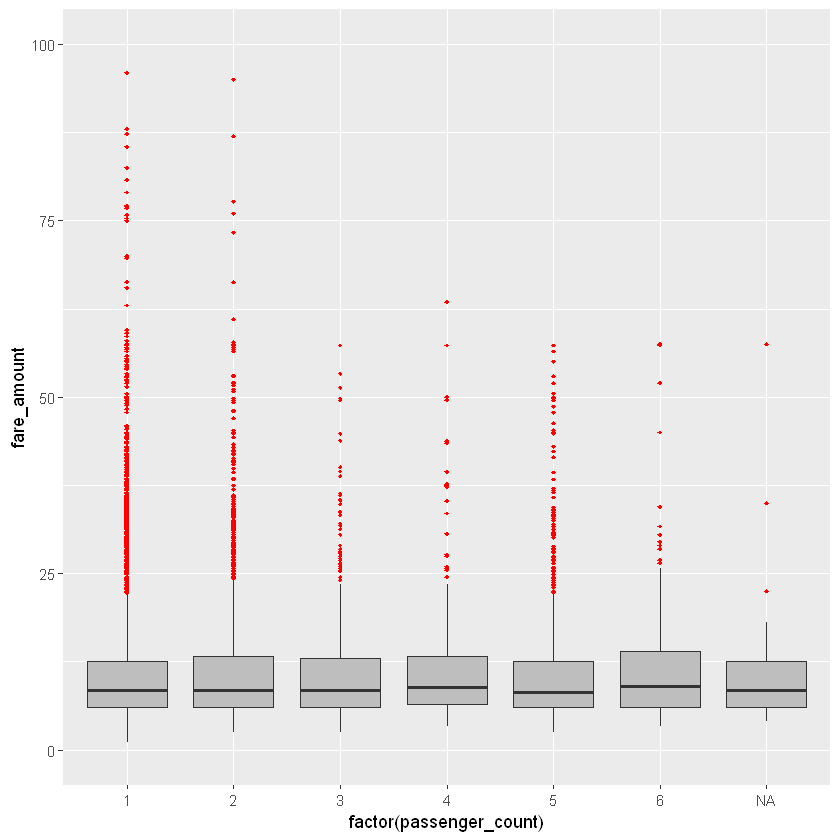

In [33]:
# We Will do Outlier Analysis only on Fare_amount just for now and we will do outlier analysis after feature engineering laitudes and longitudes.
# Boxplot for fare_amount

pl1 = ggplot(train,aes(x = factor(passenger_count),y = fare_amount))
pl1 + geom_boxplot(outlier.colour="red", fill = "grey" ,outlier.shape=18,outlier.size=1, notch=FALSE)+ylim(0,100)

In [34]:
# Replace all outliers with NA and impute

vals = train[,"fare_amount"] %in% boxplot.stats(train[,"fare_amount"])$out
train[which(vals),"fare_amount"] = NA

In [35]:
#lets check the NA's

sum(is.na(train$fare_amount))

[1] 1380

In [38]:
# lets check the missing values

sum(is.na(train$fare_amount))
str(train)

df2=train

[1] 0

'data.frame':	0 obs. of  7 variables:
 $ fare_amount      : num 
 $ pickup_datetime  : Factor w/ 16021 levels "2009-01-01 01:31:49 UTC",..: 
 $ pickup_longitude : num 
 $ pickup_latitude  : num 
 $ dropoff_longitude: num 
 $ dropoff_latitude : num 
 $ passenger_count  : num 


In [36]:
# 1.Feature Engineering for timestamp variable
# we will derive new features from pickup_datetime variable
# new features will be year,month,day_of_week,hour
#Convert pickup_datetime from factor to date time

train$pickup_date = as.Date(as.character(train$pickup_datetime))
train$pickup_weekday = as.factor(format(train$pickup_date,"%u"))# Monday = 1
train$pickup_mnth = as.factor(format(train$pickup_date,"%m"))
train$pickup_yr = as.factor(format(train$pickup_date,"%Y"))
pickup_time = strptime(train$pickup_datetime,"%Y-%m-%d %H:%M:%S")
train$pickup_hour = as.factor(format(pickup_time,"%H"))

In [37]:
#Add same features to test set

test$pickup_date = as.Date(as.character(test$pickup_datetime))
test$pickup_weekday = as.factor(format(test$pickup_date,"%u"))# Monday = 1
test$pickup_mnth = as.factor(format(test$pickup_date,"%m"))
test$pickup_yr = as.factor(format(test$pickup_date,"%Y"))
pickup_time = strptime(test$pickup_datetime,"%Y-%m-%d %H:%M:%S")
test$pickup_hour = as.factor(format(pickup_time,"%H"))

In [38]:
sum(is.na(train))# there was 1 'na' in pickup_datetime which created na's in above feature engineered variables.
train = na.omit(train) # we will remove that 1 row of na's

[1] 1441

In [39]:
train = subset(train,select = -c(pickup_datetime,pickup_date))
test = subset(test,select = -c(pickup_datetime,pickup_date))

In [40]:
# Now we will use month,weekday,hour to derive new features like sessions in a day,seasons in a year,week:weekend/weekday

f = function(x){
  if ((x >=5)& (x <= 11)){
    return ('morning')
  }
  if ((x >=12) & (x <= 16)){
    return ('afternoon')
  }
  if ((x >=17) & (x <= 20)){
    return ('evening')
  }
  if ((x >=21) & (x <= 23)){
    return ('night (PM)')
  }
  if ((x >=0) & (x <= 4)){
    return ('night (AM)')
  }
}

In [41]:
# 2.Calculate the distance travelled using longitude and latitude

deg_to_rad = function(deg){
  (deg * pi) / 180
}
haversine = function(long1,lat1,long2,lat2){
  #long1rad = deg_to_rad(long1)
  phi1 = deg_to_rad(lat1)
  #long2rad = deg_to_rad(long2)
  phi2 = deg_to_rad(lat2)
  delphi = deg_to_rad(lat2 - lat1)
  dellamda = deg_to_rad(long2 - long1)
  
  a = sin(delphi/2) * sin(delphi/2) + cos(phi1) * cos(phi2) * 
    sin(dellamda/2) * sin(dellamda/2)
  
  c = 2 * atan2(sqrt(a),sqrt(1-a))
  R = 6371e3
  R * c / 1000 #1000 is used to convert to meters
}

In [42]:
# Using haversine formula to calculate distance fr both train and test

train$dist = haversine(train$pickup_longitude,train$pickup_latitude,train$dropoff_longitude,train$dropoff_latitude)
test$dist = haversine(test$pickup_longitude,test$pickup_latitude,test$dropoff_longitude,test$dropoff_latitude)

In [43]:
# We will remove the variables which were used to feature engineer new variables

train = subset(train,select = -c(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude))
test = subset(test,select = -c(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude))

In [44]:
str(train)
summary(train)

'data.frame':	14227 obs. of  7 variables:
 $ fare_amount    : num  4.5 16.9 5.7 7.7 5.3 12.1 7.5 16.5 8.9 5.3 ...
 $ passenger_count: Factor w/ 6 levels "1","2","3","4",..: 1 1 2 1 1 1 1 1 2 1 ...
 $ pickup_weekday : Factor w/ 7 levels "1","2","3","4",..: 1 2 4 6 2 4 2 3 3 7 ...
 $ pickup_mnth    : Factor w/ 12 levels "01","02","03",..: 6 1 8 4 3 1 11 1 9 4 ...
 $ pickup_yr      : Factor w/ 7 levels "2009","2010",..: 1 2 3 4 2 3 4 4 1 4 ...
 $ pickup_hour    : Factor w/ 24 levels "00","01","02",..: 18 17 1 5 8 10 21 18 2 8 ...
 $ dist           : num  1.03 8.45 1.39 2.8 2 ...


  fare_amount     passenger_count pickup_weekday  pickup_mnth   pickup_yr  
 Min.   : 1.140   1:10092         1:1872         03     :1351   2009:2253  
 1st Qu.: 5.700   2: 2036         2:2032         05     :1338   2010:2270  
 Median : 8.000   3:  600         3:2073         01     :1336   2011:2235  
 Mean   : 8.914   4:  295         4:2059         06     :1327   2012:2249  
 3rd Qu.:11.000   5:  932         5:2107         04     :1274   2013:2219  
 Max.   :22.100   6:  272         6:2193         02     :1188   2014:2005  
                                  7:1891         (Other):6413   2015: 996  
  pickup_hour        dist         
 19     : 910   Min.   :   0.000  
 18     : 897   1st Qu.:   1.202  
 20     : 868   Median :   1.989  
 21     : 829   Mean   :   3.282  
 22     : 807   3rd Qu.:   3.300  
 09     : 715   Max.   :5420.989  
 (Other):9201                     

In [45]:
# Feature selection

numeric_index = sapply(train,is.numeric) #selecting only numeric

numeric_data = train[,numeric_index]

cnames = colnames(numeric_data)

In [46]:
# pickup_weekdat has p value greater than 0.05 

train = subset(train,select=-pickup_weekday)

In [62]:
par(mfrow=c(1,2))

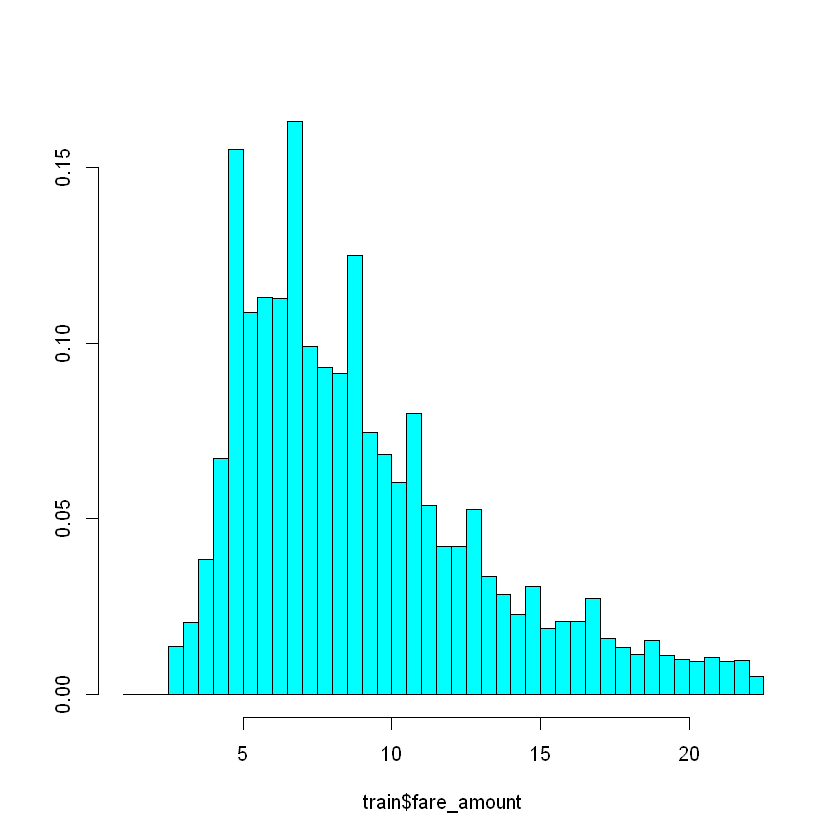

In [64]:
# truehist() scales the counts to give an estimate of the probability density.
truehist(train$fare_amount)

In [74]:
#Normalisation

print('dist')
train[,'dist'] = (train[,'dist'] - min(train[,'dist']))/
    (max(train[,'dist'] - min(train[,'dist'])))

[1] "dist"


In [76]:
# #check multicollearity
library(usdm)
vif(train[,-1])

vifcor(train[,-1], th = 0.9)

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"Warning message in Ops.factor(r, 2):
"'^' not meaningful for factors"Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"Warning message in Ops.factor(r, 2):
"'^' not meaningful for factors"Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"Warning message in Ops.factor(r, 2):
"'^' not meaningful for factors"Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"Warning message in Ops.fa

Variables,VIF
passenger_count,NA
pickup_mnth,NA
pickup_yr,NA
pickup_hour,NA
dist,1.011809


ERROR: Error in cor(x): 'x' must be numeric


                Length Class  Mode     
call                3  -none- call     
type                1  -none- character
predicted       10672  -none- numeric  
mse               500  -none- numeric  
rsq               500  -none- numeric  
oob.times       10672  -none- numeric  
importance          5  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             11  -none- list     
coefs               0  -none- NULL     
y               10672  -none- numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

ERROR: Error in regr.eval(test_data[, 1], rf_predictions): could not find function "regr.eval"


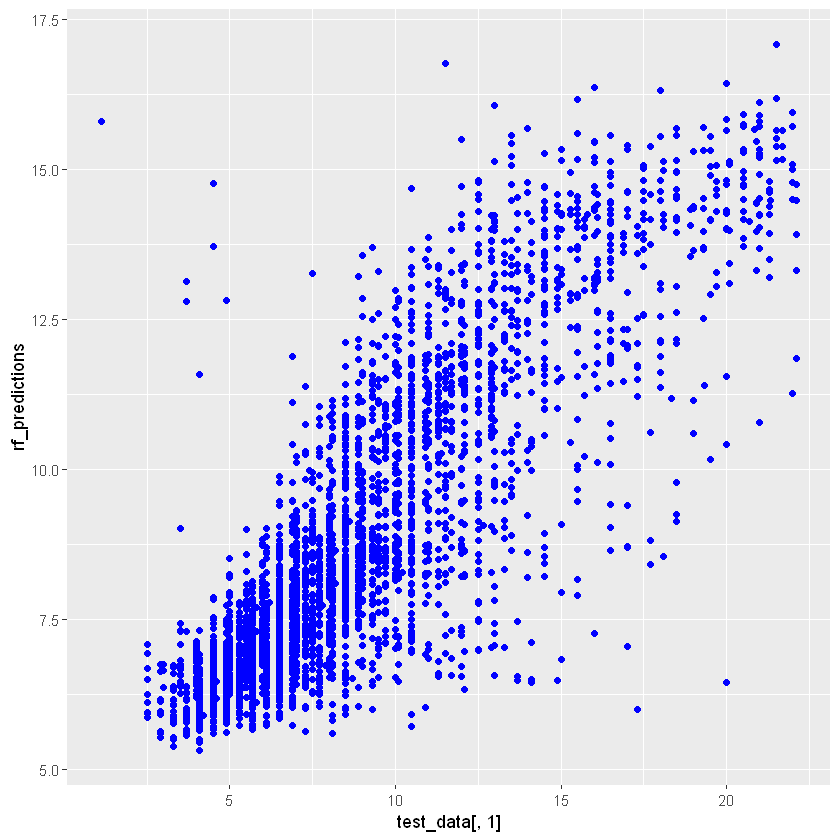

In [90]:
# Random forest

rf_model = randomForest(fare_amount ~.,data=train_data)

summary(rf_model)

rf_predictions = predict(rf_model,test_data[,2:6])

qplot(x = test_data[,1], y = rf_predictions, data = test_data, color = I("blue"), geom = "point")

regr.eval(test_data[,1],rf_predictions)